<a href="https://colab.research.google.com/github/mr-dineshk/NNDL_lab/blob/main/NNDL_exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Train the CNN model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 65s 68ms/step - loss: 0.1829 - accuracy: 0.9452 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 2/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 5/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0311 - val_accuracy: 0.9898


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0311 - accuracy: 0.9898
Test accuracy: 0.989799976348877


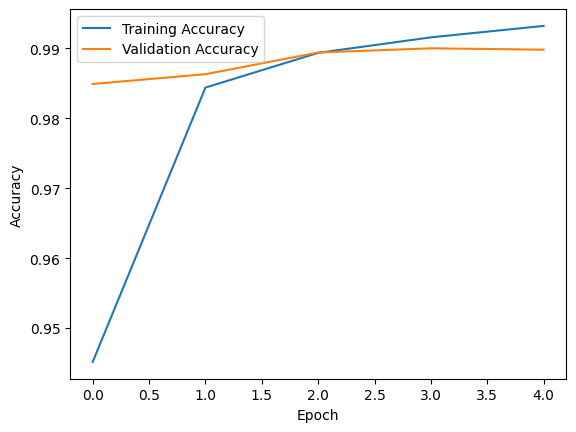

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()